# **DATOS CON PERSPECTIVA DE GÉNERO**

Nombre: María Beatriz Sánchez Díaz

Número de cuenta: 314217413

Email: bety.sanchez.diaz@gmail.com

# **ANALISIS EXPLORATORIO DE DATOS**

In [ ]:
import pandas as pd                                   # Para la manipulación y análisis de datos
import numpy as np                                    # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt                       # Para la generación de gráficas a partir de los datos
import seaborn as sns                                 # Para la visualización de datos basado en matplotlib
%matplotlib inline                
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd
import requests
data = requests.get("https://api.datamexico.org/tesseract/data.jsonrecords?Year=2018%2C2019%2C2020&cube=inegi_enoe&drilldowns=Instruction+Level%2CAge%2CState%2CSex%2CYear%2CSubgroup&locale=es&measures=Workforce%2CWorked+Hours+Week%2CWorked+Days+Week%2CMonthly+Wage&parents=false&sparse=false")
df = pd.DataFrame(data.json()["data"])
df

,Instruction Level ID,Instruction Level,Age,State ID,State,Sex ID,Sex,Year,Subgroup ID,Subgroup,Workforce,Worked Hours Week,Worked Days Week,Monthly Wage
0,0,Ninguno,15,1,Aguascalientes,1,Hombre,2019,612,Trabajadores en Actividades Ganaderas y en la ...,108,60.00000,6.0,0.000000
1,0,Ninguno,15,1,Aguascalientes,1,Hombre,2019,971,"Trabajadores de Paquetería, Empacado y de Apoy...",369,37.95122,6.0,2428.509485
2,0,Ninguno,15,4,Campeche,1,Hombre,2018,963,Lavadores y Cuidadores de Vehículos,43,66.00000,6.0,5160.000000
3,0,Ninguno,15,6,Colima,1,Hombre,2018,963,Lavadores y Cuidadores de Vehículos,107,72.00000,6.0,4300.000000
4,0,Ninguno,15,6,Colima,2,Mujer,2019,511,Trabajadores en la Preparación y Servicio de A...,45,4.00000,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814873,99,No Sabe Nivel,98,30,Veracruz de Ignacio de la Llave,1,Hombre,2019,152,Coordinadores y Jefes de Área en Servicios de ...,202,44.00000,6.0,12000.000000
814874,99,No Sabe Nivel,98,30,Veracruz de Ignacio de la Llave,1,Hombre,2019,263,Mecánicos y Técnicos en Mantenimiento y Repara...,209,54.00000,6.0,0.000000
814875,99,No Sabe Nivel,98,30,Veracruz de Ignacio de la Llave,2,Mujer,2018,961,Trabajadores Domésticos,260,50.00000,5.0,4000.000000
814876,99,No Sabe Nivel,98,30,Veracruz de Ignacio de la Llave,2,Mujer,2020,411,Comerciantes en Establecimientos,55,70.00000,7.0,0.000000


In [ ]:
df.isnull().sum()

Instruction Level ID        0
Instruction Level           0
Age                         0
State ID                    0
State                       0
Sex ID                      0
Sex                         0
Year                        0
Subgroup ID                 0
Subgroup                    0
Workforce                   0
Worked Hours Week       19033
Worked Days Week        17208
Monthly Wage                0
dtype: int64

In [ ]:
df.describe()

,Instruction Level ID,Age,State ID,Sex ID,Year,Subgroup ID,Workforce,Worked Hours Week,Worked Days Week,Monthly Wage
count,814878.000000,814878.000000,814878.000000,814878.000000,814878.000000,814878.000000,814878.000000,795845.000000,797670.000000,814878.000000
mean,4.382024,41.083643,16.305539,1.400826,2018.939858,558.010155,729.623229,41.493230,5.248639,4946.550255
std,4.175091,14.810983,9.210875,0.490066,0.796872,275.633488,1348.233665,15.674252,1.241961,5933.108476
min,0.000000,15.000000,1.000000,1.000000,2018.000000,111.000000,11.000000,0.089689,0.067529,0.000000
25%,3.000000,29.000000,8.000000,1.000000,2018.000000,282.000000,141.000000,32.489614,5.000000,976.790123
50%,4.000000,40.000000,16.000000,1.000000,2019.000000,521.000000,327.000000,43.562500,5.541262,4000.000000
75%,7.000000,52.000000,24.000000,2.000000,2020.000000,817.000000,780.000000,49.609793,6.000000,6555.936192
max,99.000000,98.000000,32.000000,2.000000,2020.000000,999.000000,66700.000000,168.000000,7.000000,300000.000000


# **LIMPIEZA Y TRANSFORMACIÓN DE DATOS**

Después de verificar el número de datos nulos en las horas y días de trabajo se decidió solucionar y reellenar aquellos datos faltantes con la media de los valores de esa caracteristica.

In [ ]:
from pandas.api.types import is_numeric_dtype
df = df.apply(lambda x: x.fillna(x.mean()) if is_numeric_dtype(x) else x)
df.head()

,Instruction Level ID,Instruction Level,Age,State ID,State,Sex ID,Sex,Year,Subgroup ID,Subgroup,Workforce,Worked Hours Week,Worked Days Week,Monthly Wage
0,0,Ninguno,15,1,Aguascalientes,1,Hombre,2019,612,Trabajadores en Actividades Ganaderas y en la ...,108,60.00000,6.0,0.000000
1,0,Ninguno,15,1,Aguascalientes,1,Hombre,2019,971,"Trabajadores de Paquetería, Empacado y de Apoy...",369,37.95122,6.0,2428.509485
2,0,Ninguno,15,4,Campeche,1,Hombre,2018,963,Lavadores y Cuidadores de Vehículos,43,66.00000,6.0,5160.000000
3,0,Ninguno,15,6,Colima,1,Hombre,2018,963,Lavadores y Cuidadores de Vehículos,107,72.00000,6.0,4300.000000
4,0,Ninguno,15,6,Colima,2,Mujer,2019,511,Trabajadores en la Preparación y Servicio de A...,45,4.00000,1.0,0.000000


In [ ]:
df.isnull().sum()

Instruction Level ID    0
Instruction Level       0
Age                     0
State ID                0
State                   0
Sex ID                  0
Sex                     0
Year                    0
Subgroup ID             0
Subgroup                0
Workforce               0
Worked Hours Week       0
Worked Days Week        0
Monthly Wage            0
dtype: int64

Se eliminan aquellos datos que pudieran afectar el resultado

In [ ]:
df= df[df['Monthly Wage']!= 0.0] 

In [ ]:
df

,Instruction Level ID,Instruction Level,Age,State ID,State,Sex ID,Sex,Year,Subgroup ID,Subgroup,Workforce,Worked Hours Week,Worked Days Week,Monthly Wage
1,0,Ninguno,15,1,Aguascalientes,1,Hombre,2019,971,"Trabajadores de Paquetería, Empacado y de Apoy...",369,37.95122,6.0,2428.509485
2,0,Ninguno,15,4,Campeche,1,Hombre,2018,963,Lavadores y Cuidadores de Vehículos,43,66.00000,6.0,5160.000000
3,0,Ninguno,15,6,Colima,1,Hombre,2018,963,Lavadores y Cuidadores de Vehículos,107,72.00000,6.0,4300.000000
5,0,Ninguno,15,7,Chiapas,1,Hombre,2018,713,"Yeseros, Instaladores de Pisos, Climas, Imperm...",152,46.00000,6.0,3010.000000
6,0,Ninguno,15,7,Chiapas,1,Hombre,2019,611,Trabajadores en Actividades Agrícolas,768,48.00000,6.0,583.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814867,99,No Sabe Nivel,98,28,Tamaulipas,1,Hombre,2020,511,Trabajadores en la Preparación y Servicio de A...,720,54.00000,6.0,2580.000000
814869,99,No Sabe Nivel,98,30,Veracruz de Ignacio de la Llave,1,Hombre,2018,262,"Auxiliares y Técnicos Industriales, Topógrafos...",110,56.00000,7.0,12000.000000
814872,99,No Sabe Nivel,98,30,Veracruz de Ignacio de la Llave,1,Hombre,2019,112,Presidentes y Directores Generales,151,48.00000,6.0,15000.000000
814873,99,No Sabe Nivel,98,30,Veracruz de Ignacio de la Llave,1,Hombre,2019,152,Coordinadores y Jefes de Área en Servicios de ...,202,44.00000,6.0,12000.000000


In [ ]:
df.describe()

,Instruction Level ID,Age,State ID,Sex ID,Year,Subgroup ID,Workforce,Worked Hours Week,Worked Days Week,Monthly Wage
count,642601.000000,642601.000000,642601.000000,642601.000000,642601.000000,642601.000000,642601.000000,642601.000000,642601.000000,642601.000000
mean,4.194500,40.483210,16.225252,1.400076,2018.940626,573.752090,798.505934,41.475945,5.221311,6272.687062
std,3.673037,14.594809,9.302887,0.489914,0.794782,272.633012,1450.651554,15.451979,1.237550,6026.665399
min,0.000000,15.000000,1.000000,1.000000,2018.000000,111.000000,11.000000,0.089689,0.067529,0.076763
25%,3.000000,29.000000,8.000000,1.000000,2018.000000,311.000000,150.000000,32.935455,5.000000,3010.000000
50%,4.000000,39.000000,16.000000,1.000000,2019.000000,531.000000,369.000000,43.142857,5.500000,5117.110266
75%,6.000000,51.000000,25.000000,2.000000,2020.000000,821.000000,853.000000,49.411192,6.000000,7740.000000
max,99.000000,98.000000,32.000000,2.000000,2020.000000,999.000000,66700.000000,168.000000,7.000000,300000.000000


Se procede a visualizar la frecuencia de las variablees con el fin de encontrar posibles outliers en los datos.

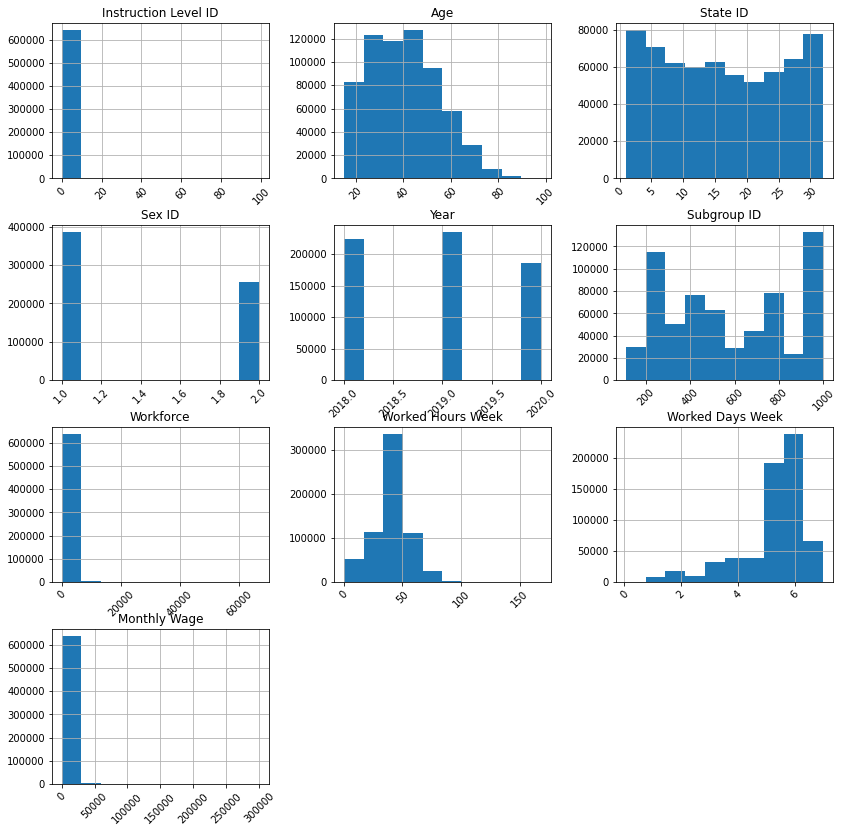

In [ ]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

In [ ]:
df['Subgroup'].unique()

array(['Trabajadores de Paquetería, Empacado y de Apoyo para Espectáculos',
       'Lavadores y Cuidadores de Vehículos',
       'Yeseros, Instaladores de Pisos, Climas, Impermeabilizante, Vidrio, Etc., Plomeros y Pintores',
       'Trabajadores en Actividades Agrícolas',
       'Trabajadores de Apoyo en Actividades Agropecuarias',
       'Trabajadores en Actividades Ganaderas y en la Cría de Animales',
       'Trabajadores en la Preparación y Servicio de Alimentos y Bebidas en Establecimientos',
       'Trabajadores Domésticos',
       'Trabajadores en el Cuidado de Personas',
       'Operadores de Máquinas y Equipos en la Elaboración de Productos Químicos, Plásticos, Tratamiento de Agua y Petroquímica',
       'Empleados de Ventas y Vendedores por Teléfono',
       'Trabajadores de Apoyo en la Construcción y la Plomería',
       'Vendedores Ambulantes de Alimentos',
       'Operadores de Máquinas y Equipos en la Elaboración de Productos Textiles, Cuero y Piel',
       'Trabajadores e

In [ ]:
profesiones = ('Auxiliares y Técnicos en Ciencias Físicas, Matemáticas, Biológicas, Químicas, del Medio Ambiente y Agronómicas',
'Técnicos Eléctricos, en Electrónica y de Equipos en Telecomunicaciones y Electromecánicos',
'Directores y Gerentes en Informática, Telecomunicaciones, Transporte y en Investigación y Desarrollo Tecnológico',
'Investigadores y Especialistas en Sistemas Computacionales',
'Investigadores y Especialistas en Ciencias Sociales',
'Ingenieros Químicos, Mecánicos, Industriales, Mineros y Metalúrgicos',
'Ingenieros Eléctricos y en Electrónica',
'Médicos Generales y Especialistas',
'Investigadores y Especialistas en Ciencias Biológicas, Químicas y del Medio Ambiente',
'Ingenieros Civiles, Topógrafos y Arquitectos',
'Especialistas en Ciencias Agronómicas',
'Ingenieros en Comunicaciones y Telecomunicaciones',
'Investigadores y Especialistas en Física, Matemáticas, Estadística y Actuaría',
'Coordinadores y Jefes de Área en Informática, Telecomunicaciones, Transporte y en Investigación y Desarrollo Tecnológico')


In [ ]:
df.to_excel('/content/sample_data/proyecto.xlsx')

In [ ]:
df['Area'] = np.where(df['Subgroup'].isin(profesiones), 'STEM', 'OTRO')

In [ ]:
df

,Instruction Level ID,Instruction Level,Age,State ID,State,Sex ID,Sex,Year,Subgroup ID,Subgroup,Workforce,Worked Hours Week,Worked Days Week,Monthly Wage,Area
1,0,Ninguno,15,1,Aguascalientes,1,Hombre,2019,971,"Trabajadores de Paquetería, Empacado y de Apoy...",369,37.95122,6.0,2428.509485,OTRO
2,0,Ninguno,15,4,Campeche,1,Hombre,2018,963,Lavadores y Cuidadores de Vehículos,43,66.00000,6.0,5160.000000,OTRO
3,0,Ninguno,15,6,Colima,1,Hombre,2018,963,Lavadores y Cuidadores de Vehículos,107,72.00000,6.0,4300.000000,OTRO
5,0,Ninguno,15,7,Chiapas,1,Hombre,2018,713,"Yeseros, Instaladores de Pisos, Climas, Imperm...",152,46.00000,6.0,3010.000000,OTRO
6,0,Ninguno,15,7,Chiapas,1,Hombre,2019,611,Trabajadores en Actividades Agrícolas,768,48.00000,6.0,583.000000,OTRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814867,99,No Sabe Nivel,98,28,Tamaulipas,1,Hombre,2020,511,Trabajadores en la Preparación y Servicio de A...,720,54.00000,6.0,2580.000000,OTRO
814869,99,No Sabe Nivel,98,30,Veracruz de Ignacio de la Llave,1,Hombre,2018,262,"Auxiliares y Técnicos Industriales, Topógrafos...",110,56.00000,7.0,12000.000000,OTRO
814872,99,No Sabe Nivel,98,30,Veracruz de Ignacio de la Llave,1,Hombre,2019,112,Presidentes y Directores Generales,151,48.00000,6.0,15000.000000,OTRO
814873,99,No Sabe Nivel,98,30,Veracruz de Ignacio de la Llave,1,Hombre,2019,152,Coordinadores y Jefes de Área en Servicios de ...,202,44.00000,6.0,12000.000000,OTRO


# **APLICACIÓN DEL MODELO BOSQUES ALEATORIOS**

In [ ]:
print(df.groupby('Area').size())

Area
OTRO    610290
STEM     32311
dtype: int64


In [ ]:
#Variables predictoras
X = np.array(df[['Instruction Level ID', 
                      'State ID', 
                      'Sex ID', 
                      'Age']])
pd.DataFrame(X)


,0,1,2,3
0,0,1,1,15
1,0,4,1,15
2,0,6,1,15
3,0,7,1,15
4,0,7,1,15
...,...,...,...,...
642596,99,28,1,98
642597,99,30,1,98
642598,99,30,1,98
642599,99,30,1,98


In [ ]:
#Variable clase
Y = np.array(df[['Area']])
pd.DataFrame(Y)

,0
0,OTRO
1,OTRO
2,OTRO
3,OTRO
4,OTRO
...,...
642596,OTRO
642597,OTRO
642598,OTRO
642599,OTRO


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [ ]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.4, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3
0,7,15,2,33
1,3,5,1,36
2,6,7,1,66
3,2,12,1,65
4,7,27,1,34
...,...,...,...,...
385555,4,13,2,29
385556,3,32,1,18
385557,2,11,1,62
385558,4,29,2,53


In [ ]:
pd.DataFrame(Y_train)

,0
0,OTRO
1,OTRO
2,OTRO
3,OTRO
4,OTRO
...,...
385555,OTRO
385556,OTRO
385557,OTRO
385558,OTRO


In [ ]:
#Se entrena el modelo a partir de los datos de entrada
ClasificacionBA = RandomForestClassifier(random_state=0)
ClasificacionBA.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=0)

In [ ]:
#Se etiquetan las clasificaciones
Y_Clasificacion = ClasificacionBA.predict(X_validation)
pd.DataFrame(Y_Clasificacion)

,0
0,OTRO
1,OTRO
2,OTRO
3,OTRO
4,OTRO
...,...
257036,OTRO
257037,OTRO
257038,OTRO
257039,OTRO


In [ ]:
Valores = pd.DataFrame(Y_validation, Y_Clasificacion)
Valores

,0
OTRO,OTRO
OTRO,OTRO
OTRO,OTRO
OTRO,OTRO
OTRO,OTRO
...,...
OTRO,OTRO
OTRO,OTRO
OTRO,OTRO
OTRO,OTRO


In [ ]:
#Se calcula la exactitud promedio de la validación
ClasificacionBA.score(X_validation, Y_validation)

0.9481172264346933

In [ ]:
#Matriz de clasificación
Y_Clasificacion = ClasificacionBA.predict(X_validation)
Matriz_Clasificacion = pd.crosstab(Y_validation.ravel(), 
                                   Y_Clasificacion, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion

Clasificación,OTRO,STEM
Real,,
OTRO,243495,646
STEM,12690,210


In [ ]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionBA.criterion)
print('Importancia variables: \n', ClasificacionBA.feature_importances_)
print("Exactitud", ClasificacionBA.score(X_validation, Y_validation))
print(classification_report(Y_validation, Y_Clasificacion))

Criterio: 
 gini
Importancia variables: 
 [0.36843588 0.25280244 0.03981047 0.33895121]
Exactitud 0.9481172264346933
              precision    recall  f1-score   support

        OTRO       0.95      1.00      0.97    244141
        STEM       0.25      0.02      0.03     12900

    accuracy                           0.95    257041
   macro avg       0.60      0.51      0.50    257041
weighted avg       0.92      0.95      0.93    257041



In [ ]:
Importancia = pd.DataFrame({'Variable': list(df[['Instruction Level ID', 
                      'State ID', 
                      'Sex ID', 
                      'Age']]),
                            'Importancia': ClasificacionBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
0,Instruction Level ID,0.368436
3,Age,0.338951
1,State ID,0.252802
2,Sex ID,0.039810
